In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Model
from keras.layers import concatenate, Dense, Input, Flatten
from keras.optimizers import *
import gym
from rl.agents import DDPGAgent
from rl.memory import SequentialMemory

/Users/admin/.pyenv/versions/3.6.6/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
Using TensorFlow backend.


In [2]:
# GymのPendulum環境を作成
env = gym.make("Pendulum-v0")

# 取りうる”打ち手”のアクション数と値の定義
nb_actions = 2
ACT_ID_TO_VALUE = {0: [-1], 1: [+1]}

print("Action Space: %s" % env.action_space)
#action  dim = 1
#critic dim = 3 with ??
print( env.observation_space.shape[0])

Action Space: Box(1,)
3


In [3]:
def actor_net(a_shape, s_shape):
    action_input = Input(shape=(1,)+s_shape)
    x = Flatten()(action_input)
    x = Dense(16, activation="relu")(x)
    x = Dense(16, activation="relu")(x)
    x = Dense(a_shape[0], activation="linear")(x)
    actor = Model(inputs=action_input, outputs=x)
    return actor

def critic_net(a_shape, s_shape):
    action_input = Input(a_shape)
    observation_input = Input(shape=(1,)+s_shape)
    flattened_observation = Flatten()(observation_input)
    x = concatenate([action_input, flattened_observation])
    x = Dense(32, activation="relu")(x)
    x = Dense(32, activation="relu")(x)
    x = Dense(1, activation="linear")(x)
    critic = Model(inputs=[action_input, observation_input], outputs=x)
    return (critic, action_input)

In [4]:
def agent(a_shape, s_shape):
    actor = actor_net(a_shape, s_shape)
    critic,  critic_action_input = critic_net(a_shape, s_shape)
    memory = SequentialMemory(limit = 50000, window_length = 1)
    agent = DDPGAgent(
        a_shape[0],
        actor,
        critic,
        critic_action_input,
        memory,
        target_model_update=.01
    )
    return agent

Training for 50000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 51s 5ms/step - reward: -5.2171
50 episodes - episode_reward: -1043.417 [-1842.855, -494.091] - loss: 70.953 - mean_squared_error: 141.905 - mean_q: -159.834

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 53s 5ms/step - reward: -2.9937
50 episodes - episode_reward: -598.731 [-1519.138, -371.343] - loss: 163.489 - mean_squared_error: 326.978 - mean_q: -254.014

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 57s 6ms/step - reward: -1.6959
50 episodes - episode_reward: -339.180 [-622.705, -2.386] - loss: 86.689 - mean_squared_error: 173.378 - mean_q: -174.636

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 57s 6ms/step - reward: -1.2374
50 episodes - episode_reward: -247.481 [-585.675, -2.549] - loss: 32.688 - mean_squared_error: 65.377 - mean_q: -103.276

Interval 5 (40000 steps 

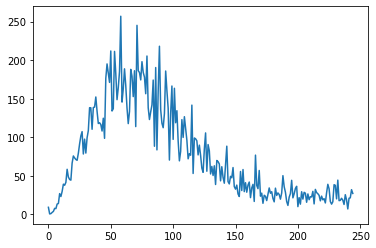

In [8]:
agent = agent(env.action_space.shape, env.observation_space.shape)

opt = 'adam'

if opt == 'adam':
    #adam optimizer
    agent.compile(Adam(lr=0.001, clipnorm=1., decay = 0.0001), metrics=["mse"])
elif opt == 'adadelta':
    #adadelta optimizer
    agent.compile(Adadelta(), metrics=['mse'])
elif opt == 'adagrad':
    #adagrad optimizer
    agent.compile(Adagrad(), metrics=['mse'])
else:
    assert False, 'Fuck'

agent.fit(env, nb_steps=50000, visualize=0, verbose=1, nb_max_episode_steps=200, loss_graph=True)
#agent.test(env, nb_episodes=5, visualize=0, nb_max_episode_steps=200)

Testing for 5 episodes ...


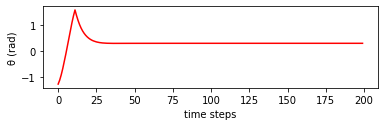

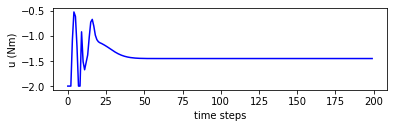

Episode 1: reward: -133.819, steps: 200


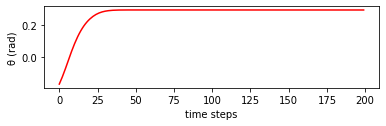

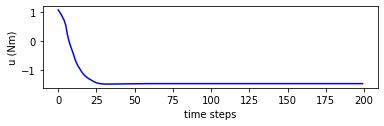

Episode 2: reward: -20.138, steps: 200


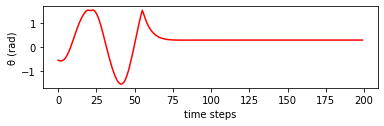

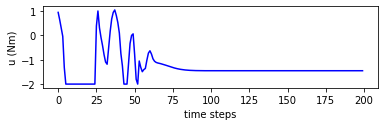

Episode 3: reward: -399.076, steps: 200


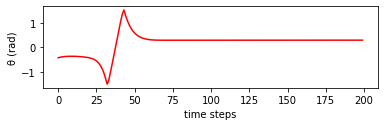

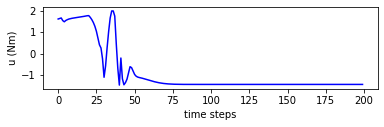

Episode 4: reward: -146.608, steps: 200


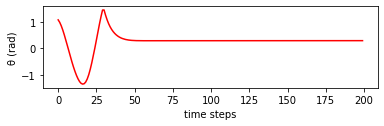

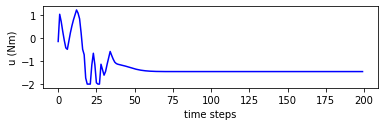

Episode 5: reward: -252.548, steps: 200


In [8]:
def agent(a_shape, s_shape):
    actor = actor_net(a_shape, s_shape)
    critic,  critic_action_input = critic_net(a_shape, s_shape)
    memory = SequentialMemory(limit = 50000, window_length = 1)
    agent = DDPGAgent(
        a_shape[0],
        actor,
        critic,
        critic_action_input,
        memory,
        target_model_update=.01
    )
    return agent

agent =  agent((1,), env.observation_space.shape)
agent.compile(Adam(lr=0.001, clipnorm=1.), metrics=["mse"])
agent.load_weights('./testview.h5')
agent.test(env, nb_episodes=5, visualize=1, nb_max_episode_steps=200, graph=1)

In [ ]:
agent.fit(env, nb_steps=30000, visualize=1, verbose=1, nb_max_episode_steps=200)

In [12]:
agent.save_weights('testview.h5')